_Lambda School Data Science_

# Regression Sprint Challenge

For this Sprint Challenge, you'll predict the price of used cars. 

The dataset is real-world. It was collected from advertisements of cars for sale in the Ukraine in 2016.

The following import statements have been provided for you, and should be sufficient. But you may not need to use every import. And you are permitted to make additional imports.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

[The dataset](https://raw.githubusercontent.com/ryanleeallred/datasets/master/car_regression.csv) contains 8,495 rows and 9 variables:

- make: manufacturer brand
- price: seller’s price in advertisement (in USD)
- body: car body type
- mileage: as mentioned in advertisement (‘000 Km)
- engV: rounded engine volume (‘000 cubic cm)
- engType: type of fuel
- registration: whether car registered in Ukraine or not
- year: year of production
- drive: drive type

Run this cell to read the data:

In [19]:
df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/car_regression.csv')
print(df.shape)
df.sample(10)

(8495, 9)


,make,price,body,mileage,engV,engType,registration,year,drive
6098,4,23000.000,0,167,3.6,3,1,2008,1
4376,49,7999.000,1,220,1.6,1,1,2004,0
1182,77,20477.535,5,1,1.6,0,1,2015,0
1046,43,123000.000,0,1,4.5,0,1,2016,1
1656,17,3200.000,3,147,1.3,1,1,2001,0
6852,59,7300.000,5,200,1.5,0,1,2007,0
6298,1,15300.000,3,62,2.2,3,1,2009,0
6470,74,26200.000,2,73,2.5,0,1,2012,1
6883,74,47700.000,0,810,4.7,1,1,2010,1
5008,39,16200.000,0,137,2.0,1,1,2012,0


# Predictive Modeling with Linear Regression

## 1.1 Split the data into an X matrix and y vector (`price` is the target we want to predict).

In [20]:
target = 'price'
features = df.columns.drop('price')

X = df[features]
y = df[target]

features

Index(['make', 'body', 'mileage', 'engV', 'engType', 'registration', 'year',
       'drive'],
      dtype='object')

## 1.2 Split the data into test and train sets, using `train_test_split`.
You may use a train size of 80% and a test size of 20%.

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=42)

## 1.3 Use scikit-learn to fit a multiple regression model, using your training data.
Use `year` and one or more features of your choice. You will not be evaluated on which features you choose. You may choose to use all features.

In [22]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

## 1.4 Report the Intercept and Coefficients for the fitted model.

In [23]:
print('Intercept:', model.intercept_)
print('Coefficients: \n', pd.Series(model.coef_, features))

Intercept: -2269355.077231418
Coefficients: 
 make             -35.167266
body           -1770.985091
mileage          -40.268597
engV             273.035408
engType        -1111.080317
registration    4535.060134
year            1140.731248
drive           8292.046139
dtype: float64


## 1.5 Use the test data to make predictions.

In [24]:
y_pred = model.predict(X_test)
y_pred

array([19200.26639279,  5355.00284406, 26205.12415048, ...,
       29728.80723151,  8920.98307381, 14092.87146182])

## 1.6 Use the test data to get both the Root Mean Square Error and $R^2$ for the model. 
You will not be evaluated on how high or low your scores are.

In [25]:
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R^2 Score:', r2_score(y_test, y_pred))

RMSE: 21394.435246002653
R^2 Score: 0.2921332237374331


## 1.7 How should we interpret the coefficient corresponding to the `year` feature?
One sentence can be sufficient

**As year increases by 1, price increases by $ 1140.**

## 1.8 How should we interpret the Root Mean Square Error?
One sentence can be sufficient

**On average, the model's predictions are off by +/- $ 21,394.**

## 1.9 How should we interpret the $R^2$?
One sentence can be sufficient

**The model features explain 29% of the variance in price.**

# Log-Linear and Polynomial Regression

## 2.1 Engineer a new variable by taking the log of the price varible.

In [26]:
df['ln_price'] = np.log(df['price'])
target = 'ln_price'
features = df.columns.drop(['price', 'ln_price'])

X = df[features]
y = df[target]

## 2.2 Visualize scatterplots of the relationship between each feature versus the log of price, to look for non-linearly distributed features.
You may use any plotting tools and techniques.

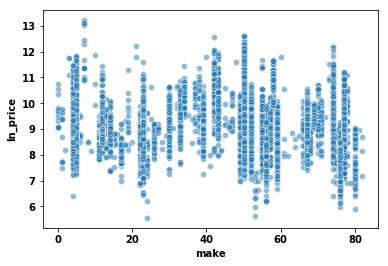

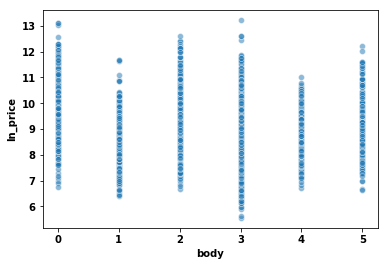

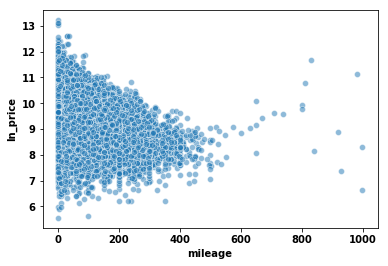

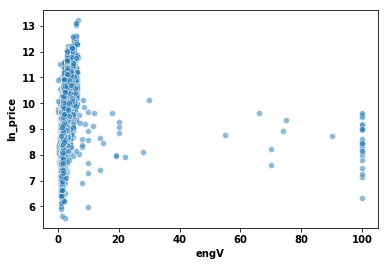

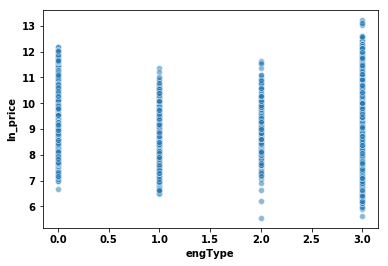

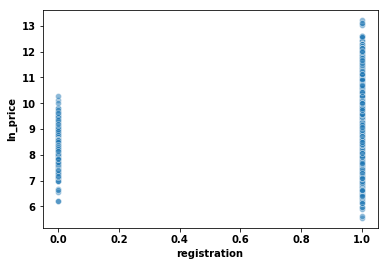

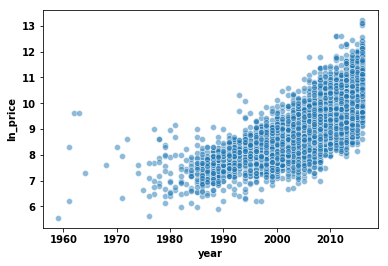

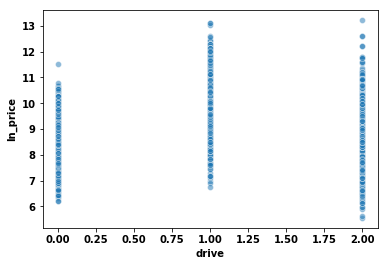

In [27]:
for feature in features:
    sns.scatterplot(x=feature, y=target, data=df, alpha=0.5)
    plt.show()

## 2.3 Create polynomial feature(s)
You will not be evaluated on which feature(s) you choose. But try to choose appropriate features.

In [28]:
df['year_squared'] = df['year'] ** 2
df['mileage_squared'] = df['mileage'] ** 2

## 2.4 Use the new log-transformed y variable and your x variables (including any new polynomial features) to fit a new linear regression model. Then report the: intercept, coefficients, RMSE, and $R^2$.

In [29]:
# Separate X variables from y variables
target = 'ln_price'
features = df.columns.drop(['price', 'ln_price'])

X = df[features]
y = df[target]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=42)

# Fit the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions using X_test
y_pred = model.predict(X_test)

# Print intercept, coefficients, RMSE, and R^2 score
print('Intercept:', model.intercept_)
print('\nCoefficients: \n', pd.Series(model.coef_, features))
print('\nRMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R^2 Score:', r2_score(y_test, y_pred))

Intercept: 6082.256345351586

Coefficients: 
 make              -1.689571e-03
body              -9.422693e-02
mileage            7.781771e-04
engV               8.220707e-03
engType           -4.809044e-02
registration       6.718426e-01
year              -6.170442e+00
drive              3.740044e-01
year_squared       1.566611e-03
mileage_squared   -2.066531e-07
dtype: float64

RMSE: 0.5628084508077518
R^2 Score: 0.6694853735896032


## 2.5 How do we interpret coefficients in Log-Linear Regression (differently than Ordinary Least Squares Regression)?
One sentence can be sufficient

We interpret the coefficients as a percentage of change in price as each variable increases by 1.

# Decision Trees

## 3.1 Use scikit-learn to fit a decision tree regression model, using your training data.
Use one or more features of your choice. You will not be evaluated on which features you choose. You may choose to use all features.

You may use the log-transformed target or the original un-transformed target. You will not be evaluated on which you choose.

In [30]:
# Separate the X variables and y varialbe
target = 'ln_price'
features = ['year', 'mileage', 'registration', 'year_squared', 'mileage_squared']

X = df[features]
y = df[target]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=42)

# fit the model
tree = DecisionTreeRegressor(max_depth=2, random_state=42)
tree.fit(X_train, y_train)

## 3.2 Use the test data to get the $R^2$ for the model. 
You will not be evaluated on how high or low your scores are.

In [32]:
print('R^2 Score:', tree.score(X_test, y_test))

R^2 Score: 0.4475286805390244


# Regression Diagnostics

## 4.1 Use statsmodels to run a log-linear or log-polynomial linear regression with robust standard errors.

In [34]:
target = 'ln_price'
features = df.columns.drop(['price', 'ln_price'])

X = df[features]
y = df[target]

# Calculate log-polynomial linear regression with robust standard errors
model = sm.OLS(y, sm.add_constant(X))
results = model.fit(cov_type='HC3')
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:               ln_price   R-squared:                       0.674
Model:                            OLS   Adj. R-squared:                  0.673
Method:                 Least Squares   F-statistic:                     1693.
Date:                Fri, 03 May 2019   Prob (F-statistic):               0.00
Time:                        12:05:22   Log-Likelihood:                -6963.9
No. Observations:                8495   AIC:                         1.395e+04
Df Residuals:                    8484   BIC:                         1.403e+04
Df Model:                          10                                         
Covariance Type:                  HC3                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            6524.4284    685.467     

## 4.2 Calculate the Variance Inflation Factor (VIF) of our X variables. 

### Do we have multicollinearity problems?
One sentence can be sufficient

In [35]:
X = sm.add_constant(X)
vif = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
pd.Series(vif, X.columns)

const              3.417162e+09
make               1.060436e+00
body               1.170016e+00
mileage            7.512926e+00
engV               1.010582e+00
engType            1.171764e+00
registration       1.108727e+00
year               1.640060e+05
drive              1.140499e+00
year_squared       1.643410e+05
mileage_squared    5.067267e+00
dtype: float64

Year and year_squared show high multicollinearity. 